<a href="https://colab.research.google.com/github/RubaEgbaria/ClassificationTechniques/blob/master/Classification_Techniques_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part One:  
In this Assignment you will explore and experiment with several classification and predictive modeling (KNN,
SVM, Decision tree and Naïve Bayesian).
For decision tree you should tune it for the best hyperparameters  
For KNN you should tune it for best K
For the best tuned classifier, you should determine the

• The confusion matrix

• Precision

• Recall

• F1-Score

• Draw the ROC curves for all classifier on one graph

Interpret and explain your observation on result

In [ ]:
import pandas as pd

data = pd.read_csv('processedGlobalTerrorism.csv', encoding='latin-1', on_bad_lines='skip', engine='python')
data.head()

,eventid,extended,country,region,provstate,city,specificity,vicinity,doubtterr,alternative,...,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,197000000001,False,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,0.00,False,False,NaN,...,NaN,1970-07-02,0.0,Assassination,Private Citizens & Property,Dominican Republic,0.0,Unknown,True,Unknown
1,197000000002,False,Mexico,North America,Federal,Mexico city,0.00,False,False,NaN,...,NaN,NaN,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,0.0,Unknown,True,Unknown
2,197001000001,False,Philippines,Southeast Asia,Tarlac,Unknown,0.75,False,False,NaN,...,NaN,NaN,0.0,Assassination,Journalists & Media,United States,0.0,Unknown,True,Unknown
3,197001000002,False,Greece,Western Europe,Attica,Athens,0.00,False,False,NaN,...,NaN,NaN,0.0,Bombing/Explosion,Government (Diplomatic),United States,0.0,Unknown,True,Explosives
4,197001000003,False,Japan,East Asia,Fukouka,Fukouka,0.00,False,True,NaN,...,NaN,NaN,0.0,Facility/Infrastructure Attack,Government (Diplomatic),United States,0.0,Unknown,True,Incendiary


In [ ]:
data.shape

(156328, 47)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

originalData = data.copy()

y = data['attackType']
x = data.drop('attackType', axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numCols = xTrain.select_dtypes(include=['int64', 'float64']).columns
catCols = xTrain.select_dtypes(include=['object']).columns

xTrain[catCols] = xTrain[catCols].astype('category')
xTest[catCols] = xTest[catCols].astype('category')

numericalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoricalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericalPipeline, numCols),
        ('cat', categoricalPipeline, catCols)
    ])

xTrainEncoded = preprocessor.fit_transform(xTrain)
xTestEncoded = preprocessor.transform(xTest)

# K-Nearest Neighbor

Matplotlib is building the font cache; this may take a moment.


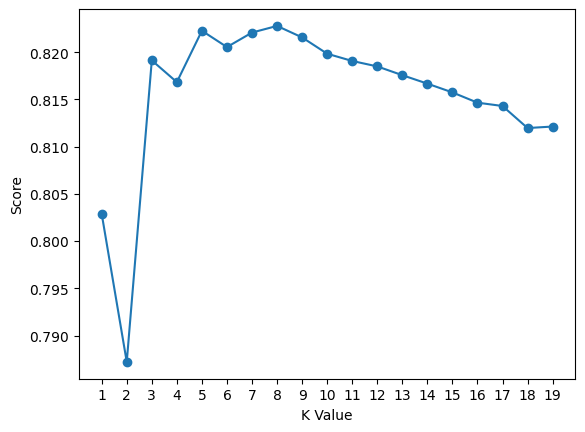

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

scoreList = []
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i)  # Getting best K
    neigh.fit(xTrainEncoded, yTrain)
    scoreList.append(neigh.score(xTestEncoded, yTest))

plt.plot(range(1,20), scoreList, marker='o')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()

In [ ]:
# print best K
bestK = scoreList.index(max(scoreList)) + 1
print(f"Best K: {bestK}")

Best K: 8


In [ ]:
import micropip
await micropip.install('seaborn')

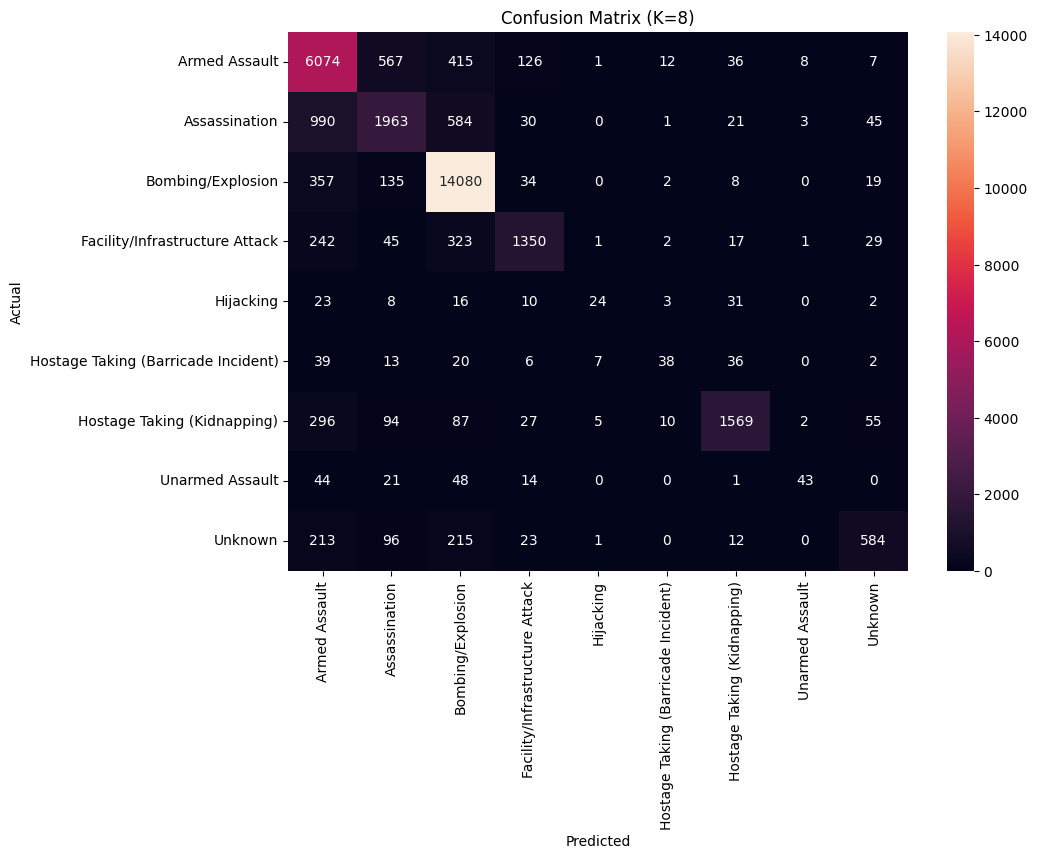

In [ ]:
import seaborn as sns

# The confusion matrix
neigh = KNeighborsClassifier(n_neighbors = bestK)
neigh.fit(xTrainEncoded, yTrain)
yPred = neigh.predict(xTestEncoded)
confusion_matrix(yTest, yPred)

# Confusion Matrix  (Visualization)
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(yTest, yPred),
            annot=True, fmt='d',
            xticklabels=neigh.classes_,
            yticklabels=neigh.classes_)
plt.title(f'Confusion Matrix (K={bestK})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(yTest, yPred, target_names=neigh.classes_))

                                     precision    recall  f1-score   support

                      Armed Assault       0.73      0.84      0.78      7246
                      Assassination       0.67      0.54      0.60      3637
                  Bombing/Explosion       0.89      0.96      0.93     14635
     Facility/Infrastructure Attack       0.83      0.67      0.74      2010
                          Hijacking       0.62      0.21      0.31       117
Hostage Taking (Barricade Incident)       0.56      0.24      0.33       161
        Hostage Taking (Kidnapping)       0.91      0.73      0.81      2145
                    Unarmed Assault       0.75      0.25      0.38       171
                            Unknown       0.79      0.51      0.62      1144

                           accuracy                           0.82     31266
                          macro avg       0.75      0.55      0.61     31266
                       weighted avg       0.82      0.82      0.81     312

# Naïve Bayesian

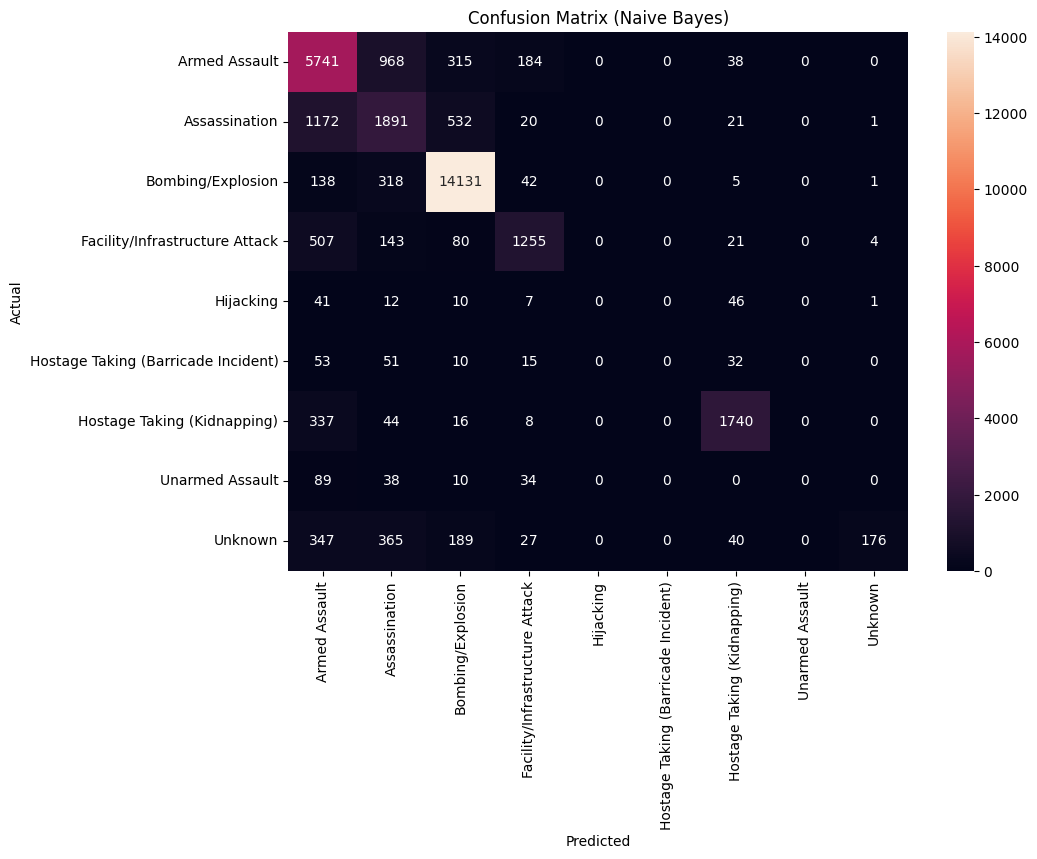

In [ ]:
from sklearn.naive_bayes import BernoulliNB

NBclassifier = BernoulliNB(binarize=0.0)
NBclassifier.fit(xTrainEncoded, yTrain)

yPredNB = NBclassifier.predict(xTestEncoded)
# Confusion Matrix (Visualization)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(yTest, yPredNB),
            annot=True, fmt='d',
            xticklabels=NBclassifier.classes_,
            yticklabels=NBclassifier.classes_)
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(yTest, yPredNB, target_names=NBclassifier.classes_))

/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                     precision    recall  f1-score   support

                      Armed Assault       0.68      0.79      0.73      7246
                      Assassination       0.49      0.52      0.51      3637
                  Bombing/Explosion       0.92      0.97      0.94     14635
     Facility/Infrastructure Attack       0.79      0.62      0.70      2010
                          Hijacking       0.00      0.00      0.00       117
Hostage Taking (Barricade Incident)       0.00      0.00      0.00       161
        Hostage Taking (Kidnapping)       0.90      0.81      0.85      2145
                    Unarmed Assault       0.00      0.00      0.00       171
                            Unknown       0.96      0.15      0.27      1144

                           accuracy                           0.80     31266
                          macro avg       0.53      0.43      0.44     31266
                       weighted avg       0.80      0.80      0.78     312

# Decision tree

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Decision Tree

dtClassifier = DecisionTreeClassifier(random_state=42)
dtClassifier.fit(xTrainEncoded, yTrain)

# feature importances
featureImportances = dtClassifier.feature_importances_

featureImportancesDf = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': featureImportances})
featureImportancesDf = featureImportancesDf.sort_values(by='Importance', ascending=False)

# top 20
featureImportancesDf = featureImportancesDf.head(20)
print(featureImportancesDf)

                                           Feature  Importance
67748                   cat__weaponType_Explosives    0.384609
11                               num__hostkidCount    0.096816
67750                     cat__weaponType_Firearms    0.068642
0                                     num__eventid    0.057819
67756                      cat__weaponType_Unknown    0.039122
6                                   num__killCount    0.035443
17                               num__weaponsCount    0.015264
8                                  num__woundCount    0.014052
67751                   cat__weaponType_Incendiary    0.013888
67507         cat__targetType_Government (General)    0.012769
10                                 num__propValue,    0.007007
3                                  num__perpsCount    0.006733
67510                     cat__targetType_Military    0.005473
67519               cat__targetType_Transportation    0.003668
67508          cat__targetType_Journalists & Media    0

<ipython-input-23-da05d95b4a0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=featureImportancesDf.head(20), y='Feature', x='Importance', palette='viridis')


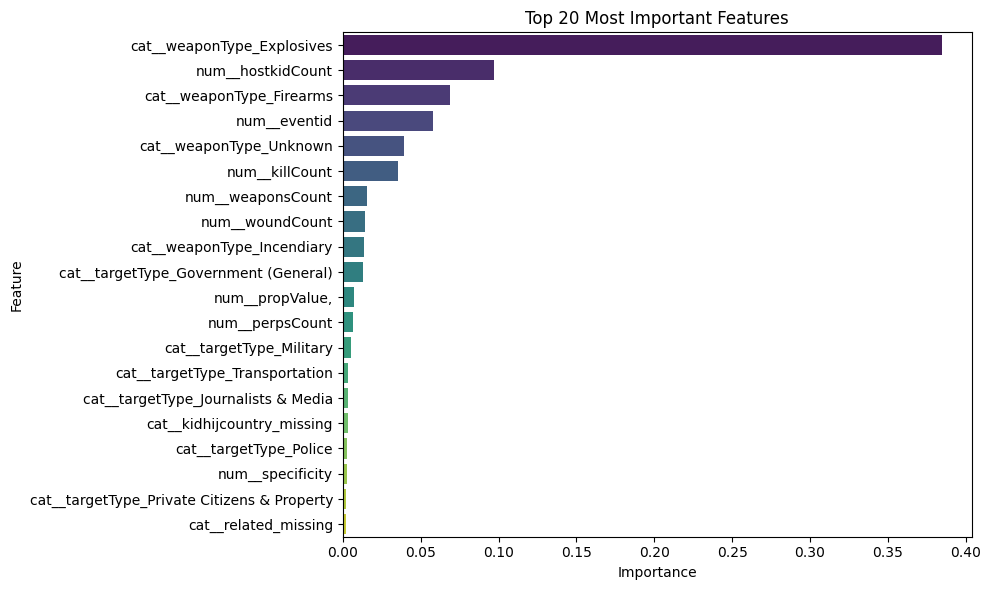

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=featureImportancesDf.head(20), y='Feature', x='Importance', palette='viridis')
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()

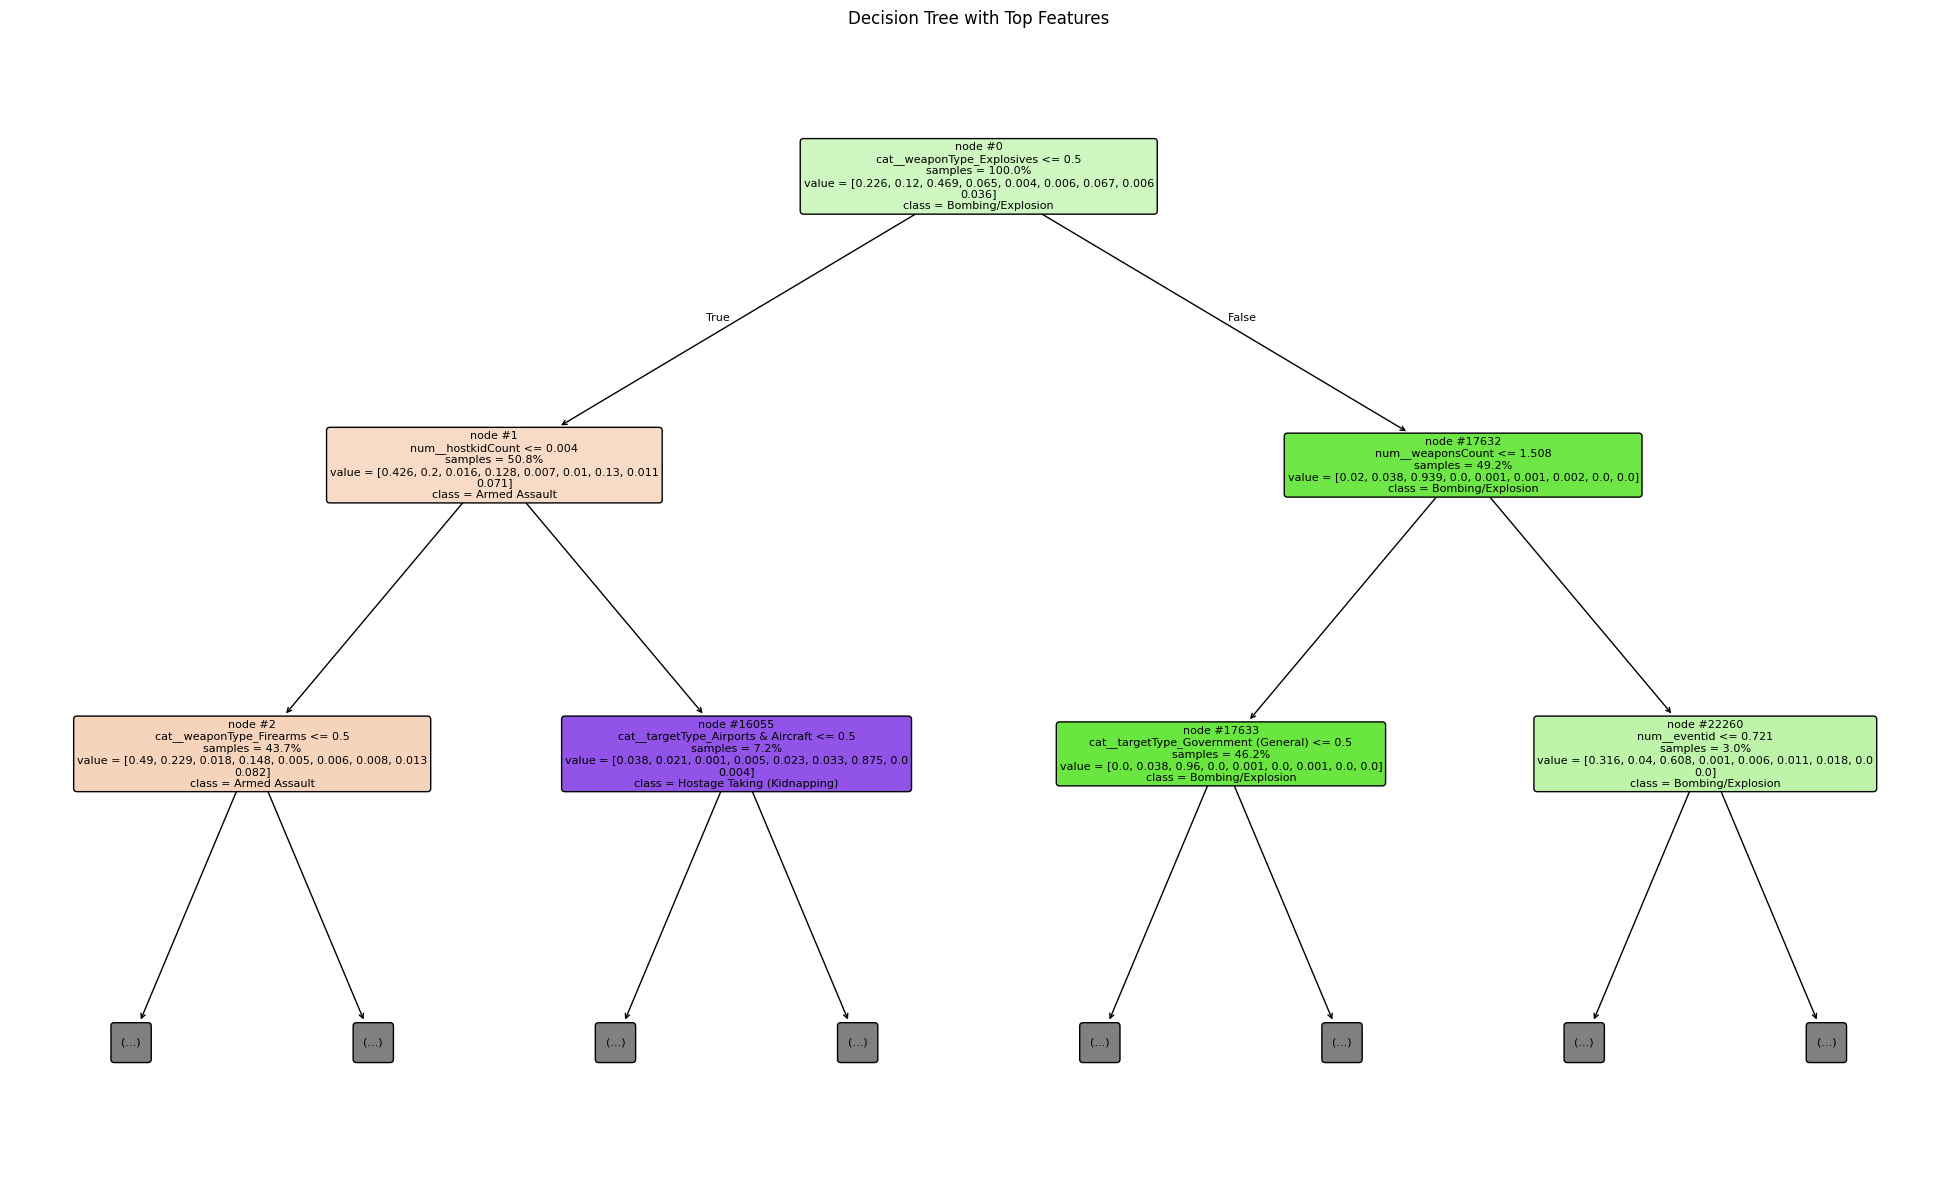

In [ ]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(xTrainEncoded, yTrain)

plt.figure(figsize=(25,15))
tree.plot_tree(
    treeClf,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=treeClf.classes_,
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=2,
    fontsize=8,
    impurity=False,
    node_ids=True,
    ax=plt.gca()
)
plt.title("Decision Tree with Top Features", fontsize=12)
plt.show()

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 267, 'min_samples_split': 267}


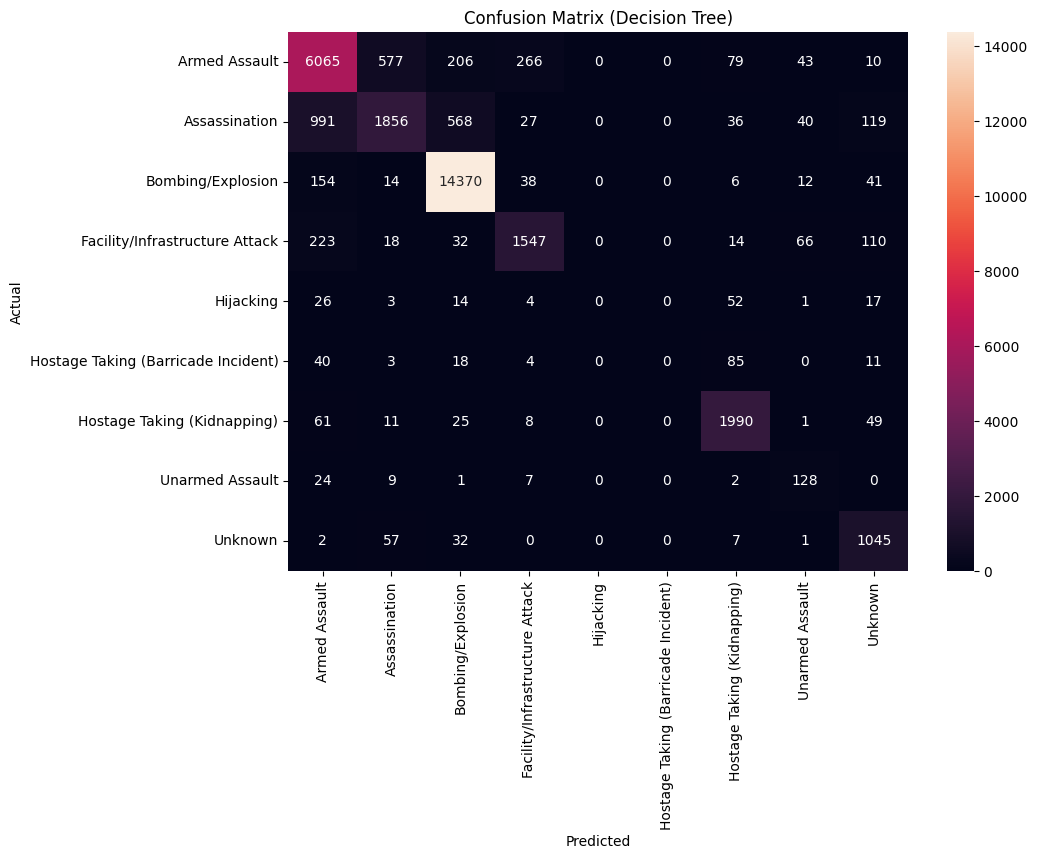

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree
paramGrid = {
    # Best hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 267, 'min_samples_split': 267}
    'criterion': ['entropy'],
    'max_depth': [12], # as we got from tuning the hyperparameters
    'min_samples_split': [267], # as we got from tuning the hyperparameters
    'min_samples_leaf': [267] # as we got from tuning the hyperparameters
}

dtClassifier = DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(dtClassifier, paramGrid, cv=5, scoring='accuracy')
gridSearch.fit(xTrainEncoded, yTrain)

# For decision tree you should tune it for the best hyperparameters

dtBestClassifier = gridSearch.best_estimator_
print("Best hyperparameters:", gridSearch.best_params_)

yPredDt = dtBestClassifier.predict(xTestEncoded)

# Confusion Matrix (Visualization)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(yTest, yPredDt),
            annot=True, fmt='d',
            xticklabels=dtBestClassifier.classes_,
            yticklabels=dtBestClassifier.classes_)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(yTest, yPredDt, target_names=dtBestClassifier.classes_))

/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                     precision    recall  f1-score   support

                      Armed Assault       0.80      0.84      0.82      7246
                      Assassination       0.73      0.51      0.60      3637
                  Bombing/Explosion       0.94      0.98      0.96     14635
     Facility/Infrastructure Attack       0.81      0.77      0.79      2010
                          Hijacking       0.00      0.00      0.00       117
Hostage Taking (Barricade Incident)       0.00      0.00      0.00       161
        Hostage Taking (Kidnapping)       0.88      0.93      0.90      2145
                    Unarmed Assault       0.44      0.75      0.55       171
                            Unknown       0.75      0.91      0.82      1144

                           accuracy                           0.86     31266
                          macro avg       0.59      0.63      0.61     31266
                       weighted avg       0.85      0.86      0.86     312

# SVM

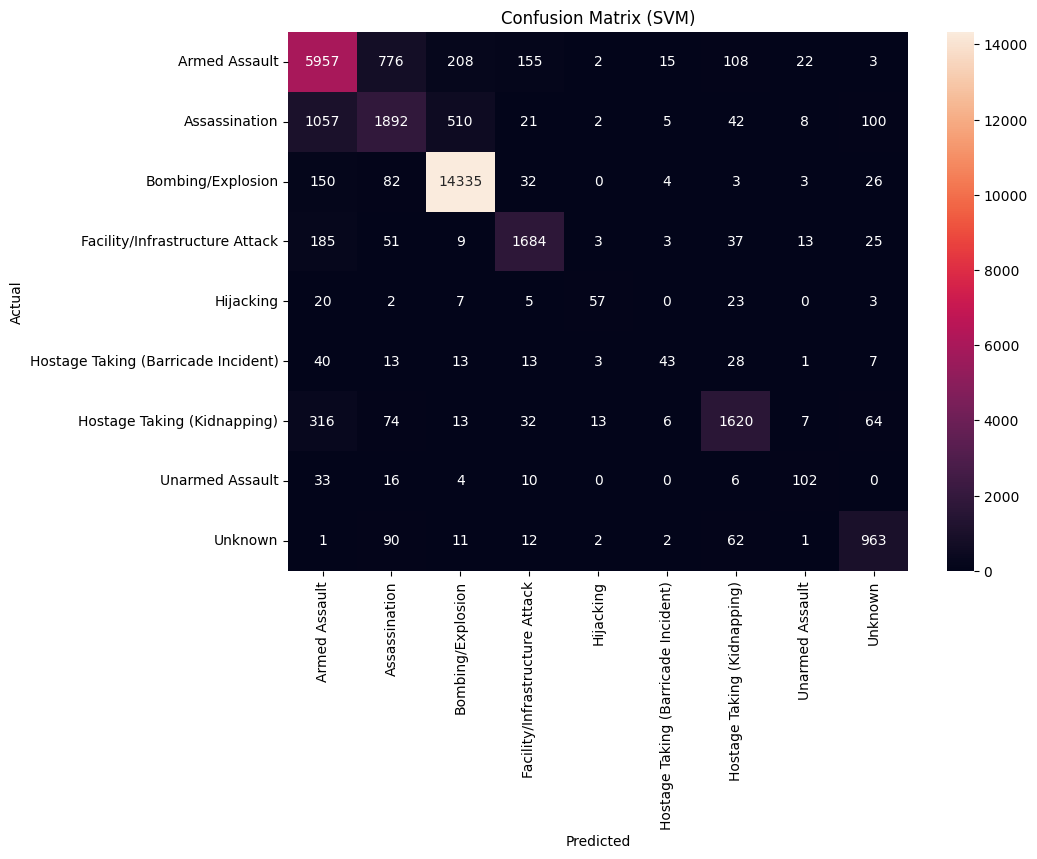

In [ ]:
# Support Vector Machine

from sklearn.svm import SVC

svmBestClassifier = SVC(kernel='linear')
svmBestClassifier.fit(xTrainEncoded, yTrain)

yPredSVM = svmBestClassifier.predict(xTestEncoded)

# Confusion Matrix (Visualization)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(yTest, yPredSVM),
            annot=True, fmt='d',
            xticklabels=svmBestClassifier.classes_,
            yticklabels=svmBestClassifier.classes_)

plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(yTest, yPredSVM, target_names=svmBestClassifier.classes_))

                                     precision    recall  f1-score   support

                      Armed Assault       0.77      0.82      0.79      7246
                      Assassination       0.63      0.52      0.57      3637
                  Bombing/Explosion       0.95      0.98      0.96     14635
     Facility/Infrastructure Attack       0.86      0.84      0.85      2010
                          Hijacking       0.70      0.49      0.57       117
Hostage Taking (Barricade Incident)       0.55      0.27      0.36       161
        Hostage Taking (Kidnapping)       0.84      0.76      0.80      2145
                    Unarmed Assault       0.65      0.60      0.62       171
                            Unknown       0.81      0.84      0.82      1144

                           accuracy                           0.85     31266
                          macro avg       0.75      0.68      0.71     31266
                       weighted avg       0.85      0.85      0.85     312

# ROC Curve

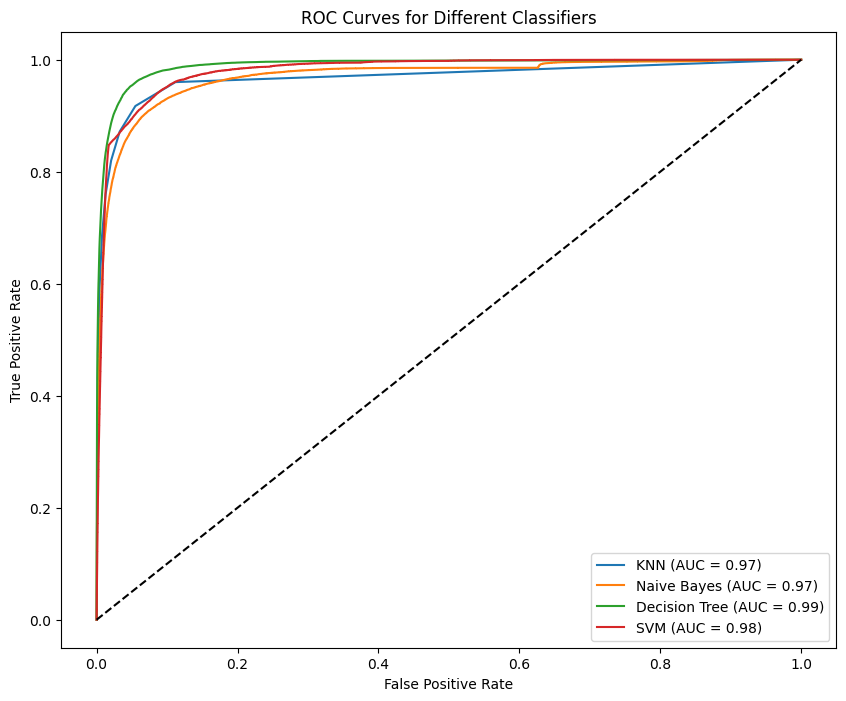

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(yTest, classes=np.unique(yTest))
n_classes = y_test_bin.shape[1]

models = {
    "KNN": (neigh, yPred),
    "Naive Bayes": (NBclassifier, yPredNB),
    "Decision Tree": (dtBestClassifier, yPredDt),
    "SVM": (svmBestClassifier, yPredSVM)
}

plt.figure(figsize=(10, 8))
for model_name, (model, y_pred) in models.items():
    try:
      y_score = model.predict_proba(xTestEncoded)
    except AttributeError:
      try:
          y_score = model.decision_function(xTestEncoded)
      except AttributeError:
          print(f"Cannot compute ROC curve for {model_name}: Neither predict_proba nor decision_function available.")
          continue

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(NBclassifier)

BernoulliNB()


In [ ]:
print(svmBestClassifier)

SVC(kernel='linear')


In [ ]:
print(dtBestClassifier)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=267,
                       min_samples_split=267, random_state=42)


In [ ]:
print(neigh)

KNeighborsClassifier(n_neighbors=8)


In [ ]:
from IPython.display import Markdown

display(Markdown("""
## Model Performance Summary (AUC Scores)

| Rank | Model          | AUC Score | Performance Level        |
|------|----------------|-----------|--------------------------|
| 1    | Decision Tree  | 0.99      | Excellent                |
| 2    | SVM            | 0.98      | Outstanding              |
| 3    | KNN            | 0.97      | Very Good                |
| 4    | Naive Bayes    | 0.97      | Very Good                |

**Key Insights:**
- All models achieved **strong performance** (AUC > 0.95)
- **Decision Tree** showed near-perfect classification (AUC = 0.99)
- **SVM** closely followed with outstanding results (AUC = 0.98)
- **KNN and Naive Bayes** performed very similarly (AUC = 0.97)

**Recommendation:**
For critical applications where even 1% improvement matters, the **Decision Tree** would be the optimal choice.
"""))


## Model Performance Summary (AUC Scores)

| Rank | Model          | AUC Score | Performance Level        |
|------|----------------|-----------|--------------------------|
| 1    | Decision Tree  | 0.99      | Excellent                |
| 2    | SVM            | 0.98      | Outstanding              |
| 3    | KNN            | 0.97      | Very Good                |
| 4    | Naive Bayes    | 0.97      | Very Good                |

**Key Insights:**
- All models achieved **strong performance** (AUC > 0.95)
- **Decision Tree** showed near-perfect classification (AUC = 0.99)
- **SVM** closely followed with outstanding results (AUC = 0.98)
- **KNN and Naive Bayes** performed very similarly (AUC = 0.97)

**Recommendation:**  
For critical applications where even 1% improvement matters, the **Decision Tree** would be the optimal choice.
